In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results = pd.read_csv('./data/results.csv')
bios = pd.read_csv('./data/bios.csv')
coffee = pd.read_csv('./data/coffee.csv')

In [3]:
coffee.loc[2:5, 'Units Sold'] = np.nan
coffee.loc[[0,6,9], 'Coffee Type'] = np.nan
coffee

,Day,Coffee Type,Units Sold
0,Monday,NaN,25.0
1,Monday,Latte,15.0
2,Tuesday,Espresso,NaN
3,Tuesday,Latte,NaN
4,Wednesday,Espresso,NaN
5,Wednesday,Latte,NaN
6,Thursday,NaN,40.0
7,Thursday,Latte,30.0
8,Friday,Espresso,45.0
9,Friday,NaN,35.0


In [4]:
df = coffee

In [5]:
# Descriptive statistics for numerical features
print("Numerical Features:")
df.describe()

Numerical Features:


,Units Sold
count,10.000000
mean,35.000000
std,9.718253
min,15.000000
25%,31.250000
50%,35.000000
75%,43.750000
max,45.000000


In [6]:
# Check data types of each column in the DataFrame
data_types = df.dtypes
print("Data Types:")
print(data_types)

Data Types:
Day             object
Coffee Type     object
Units Sold     float64
dtype: object


In [7]:
# Or alternatively you could do
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          14 non-null     object 
 1   Coffee Type  11 non-null     object 
 2   Units Sold   10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 468.0+ bytes


In [8]:
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 14     │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %     ┃ mean   ┃ sd      ┃ p0   ┃ p25     ┃ p50   ┃ p75     ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Units Sold       │    4 │    28.57 │     35 │   9.718 │   15 │   31.25 │    35 │   43.75 │    45 │ ▂ ▂▂▆▇  │  │
│ └──────────────────┴──────┴──────────┴────────┴─────────┴──────┴─────────┴───────┴─────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA     ┃ NA %         ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Day                      │      0 │            0 │                            1 │                       14 │  │
│ │ Coffee Type              │      3 │        21.43 │                         0.79 │                       11 │  │
│ └──────────────────────────┴────────┴──────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [9]:
print("Categorical Features:\n")
categorical_columns = df.select_dtypes(include=['object', 'category'])
for col in categorical_columns:
    print(f"Column: {col}")
    
    # Get unique value count
    unique_values = df[col].nunique()
    print(f"Unique Values: {unique_values}")
    
    # Get the mode (most frequent value)
    mode = df[col].mode()[0]
    mode_count = df[col].value_counts().iloc[0]
    mode_pct = (mode_count / len(df)) * 100
    print(f"Mode: {mode} (Count: {mode_count}, {mode_pct:.2f}% of total)")
    
    # Get the second mode (second most frequent value if it exists)
    if len(df[col].value_counts()) > 1:
        second_mode = df[col].value_counts().index[1]
        second_mode_count = df[col].value_counts().iloc[1]
        second_mode_pct = (second_mode_count / len(df)) * 100
        print(f"Second Mode: {second_mode} (Count: {second_mode_count}, {second_mode_pct:.2f}% of total)")
    else:
        print("Second Mode: None")

Categorical Features:

Column: Day
Unique Values: 7
Mode: Friday (Count: 2, 14.29% of total)
Second Mode: Tuesday (Count: 2, 14.29% of total)
Column: Coffee Type
Unique Values: 2
Mode: Latte (Count: 6, 42.86% of total)
Second Mode: Espresso (Count: 5, 35.71% of total)


In [10]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Day            0
Coffee Type    3
Units Sold     4
dtype: int64


In [11]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Day, Coffee Type, Units Sold]
Index: []


In [12]:
columns_to_check = df.select_dtypes(include=['float64', 'int64'])

# Function to find records with outliers
def find_outliers_pandas(data, column):
	Q1 = data[column].quantile(0.25)
	Q3 = data[column].quantile(0.75)
	IQR = Q3 - Q1
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR
	outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
	return outliers

# Find records with outliers for each specified column
outliers_dict = {}

for column in columns_to_check:
	outliers_dict[column] = find_outliers_pandas(df, column)

# Print the records with outliers for each column
for column, outliers in outliers_dict.items():
	print(f"Outliers in '{column}':")
	print(outliers)
	print("\n")

Outliers in 'Units Sold':
Empty DataFrame
Columns: [Day, Coffee Type, Units Sold]
Index: []




In [13]:
# Check numerical value range for columns
valid_range = (0, 40)  
columns_to_check = df.select_dtypes(include=['float64', 'int64'])
for col in columns_to_check:
    value_range_check = df[~df[col].between(*valid_range)]
    print(f"Value Range Check ({col}):")
    print(value_range_check)

Value Range Check (Units Sold):
          Day Coffee Type  Units Sold
2     Tuesday    Espresso         NaN
3     Tuesday       Latte         NaN
4   Wednesday    Espresso         NaN
5   Wednesday       Latte         NaN
8      Friday    Espresso        45.0
10   Saturday    Espresso        45.0
12     Sunday    Espresso        45.0


In [14]:
# Missing values report
print("\nMissing Values Report:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
display(missing_report[missing_report['Missing Values'] > 0])


Missing Values Report:


,Missing Values,Percentage (%)
Coffee Type,3,21.428571
Units Sold,4,28.571429


Histograms for Continuous Features:


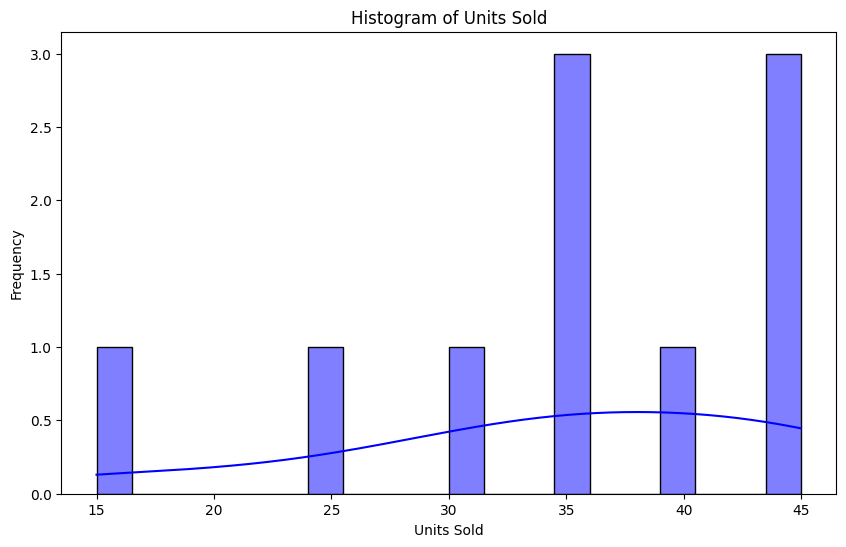

In [15]:
# Visualizations: Histograms for continuous features
print("Histograms for Continuous Features:")
continuous_df = df.select_dtypes(include=['float64', 'int64'])
for col in continuous_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(continuous_df[col].dropna(), kde=True, bins=20, color='blue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Bar Plots for Categorical Features:


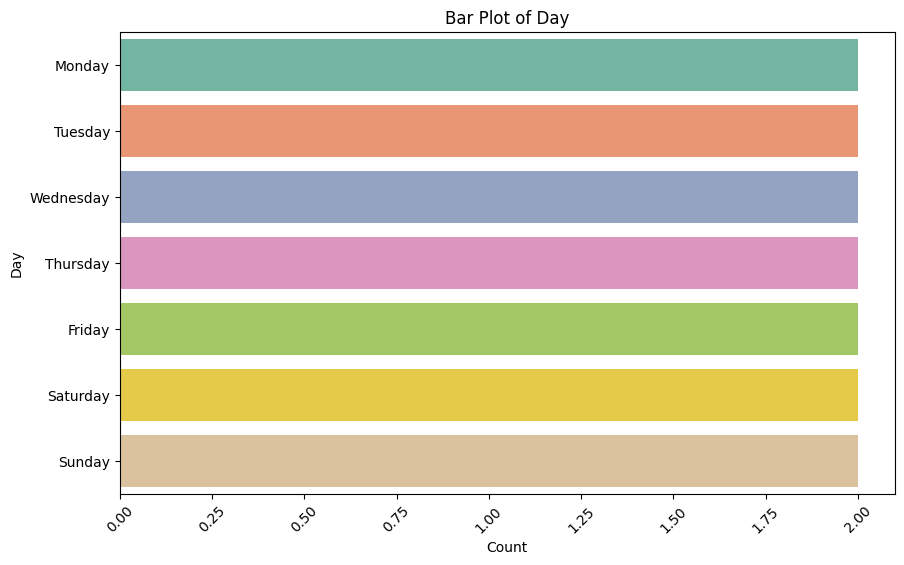

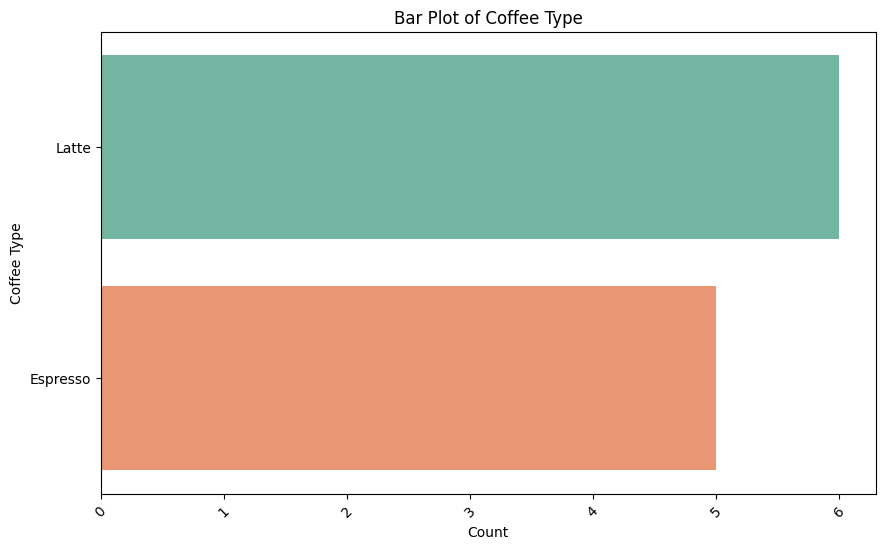

In [16]:

# Visualizations: Bar plots for categorical features
print("Bar Plots for Categorical Features:")
categorical_df = df.select_dtypes(include=['object', 'category'])
for col in categorical_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, hue=col, palette="Set2", legend=False)
    plt.title(f"Bar Plot of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()